<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Descriptive_and_Inferential_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stats ANOVA

https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html

In [1]:

from urllib.request import urlopen
import numpy as np
np.set_printoptions(precision=4, suppress=True)

import pandas as pd
pd.set_option("display.width", 100)
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'http://stats191.stanford.edu/data/salary.table'
fh = urlopen(url)
salary_table = pd.read_table(fh)
salary_table.head()

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


In [4]:
E = salary_table.E
M = salary_table.M
X = salary_table.X
S = salary_table.S

In [7]:
factor_groups = salary_table.groupby(['E','M'])
for values, group in factor_groups:
  print(values)
  print(group)

(1, 0)
        S   X  E  M
7   10535   2  1  0
13  11417   4  1  0
20  12336   6  1  0
28  13548   8  1  0
29  14467  10  1  0
34  14861  11  1  0
37  15990  13  1  0
43  17483  16  1  0
45  19346  20  1  0
(1, 1)
        S  X  E  M
0   13876  1  1  1
10  14975  3  1  1
19  15965  5  1  1
24  16978  7  1  1
26  17404  8  1  1
(2, 0)
        S   X  E  M
3   11283   1  2  0
6   11772   2  2  0
9   12313   3  2  0
16  12884   4  2  0
17  13245   5  2  0
22  13839   6  2  0
25  14803   8  2  0
30  15942  10  2  0
35  16882  12  2  0
39  17949  14  2  0
42  18838  16  2  0
44  19207  17  2  0
(2, 1)
        S   X  E  M
5   20872   2  2  1
11  21371   3  2  1
23  22884   6  2  1
32  23780  10  2  1
33  25410  11  2  1
38  26330  13  2  1
41  27837  16  2  1
(3, 0)
        S  X  E  M
1   11608  1  3  0
4   11767  1  3  0
8   12195  2  3  0
15  13231  4  3  0
18  13677  5  3  0
(3, 1)
        S   X  E  M
2   18701   1  3  1
12  19800   3  3  1
14  20263   4  3  1
21  21352   6  3  1
27  22184 

1 0
1 1
2 0
2 1
3 0
3 1


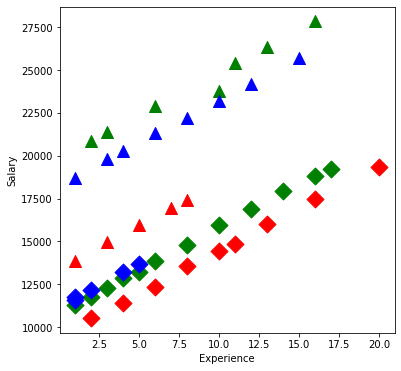

In [8]:
plt.figure(figsize=(6,6))
symbols = ['D', '^']
colors = ['r', 'g', 'blue']
factor_groups = salary_table.groupby(['E','M'])
for values, group in factor_groups:
    i,j = values
    print(i,j)
    plt.scatter(group['X'], group['S'], marker=symbols[j], color=colors[i-1],
               s=144)
plt.xlabel('Experience');
plt.ylabel('Salary');
# X: Experience
# S: Salary
# E: group 1,2,3 - color r, g, blue
# M: group 0,1 - marker: 'D' and '^'

- Fit a linear model:

In [9]:
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, salary_table).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      S   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           2.23e-27
Time:                        02:12:44   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8035.5976    386.689     20.781      0.0

In [10]:
lm.model.exog[:5]

array([[1., 0., 0., 1., 1.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1.]])

In [11]:
lm.model.data.orig_exog[:5]

,Intercept,C(E)[T.2],C(E)[T.3],C(M)[T.1],X
0,1.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,1.0,1.0
3,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,1.0


In [12]:
lm.model.data.frame[:5]

,S,X,E,M
0,13876,1,1,1
1,11608,1,3,0
2,18701,1,3,1
3,11283,1,2,0
4,11767,1,3,0


Influence statistics

In [13]:
infl = lm.get_influence()
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0  13876.000  15465.313      0.104     -1.683      0.155     -0.722     -1.723     -0.739
         1  11608.000  11577.992      0.000      0.031      0.130      0.012      0.031      0.012
         2  18701.000  18461.523      0.001      0.247      0.109      0.086      0.244      0.085
         3  11283.000  11725.817      0.005     -0.458      0.113     -0.163     -0.453     -0.162
         4  11767.000  11577.992      0.001      0.197      0.130      0.076      0.195      0.075
         5  20872.000  19155.532      0.092      1.787      0.126      0.678      1.838      0.698
         6  11772.000  12272.001      0.006     -0.513      0.101     -0.172     -0.509     -0.170
         7

In [14]:
df_infl = infl.summary_frame()
df_infl[:5]

,dfb_Intercept,dfb_C(E)[T.2],dfb_C(E)[T.3],dfb_C(M)[T.1],dfb_X,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.505123,0.376134,0.483977,-0.369677,0.399111,0.104186,-1.683099,0.155327,-0.721753,-1.723037,-0.738880
1,0.004663,0.000145,0.006733,-0.006220,-0.004449,0.000029,0.031318,0.130266,0.012120,0.030934,0.011972
2,0.013627,0.000367,0.036876,0.030514,-0.034970,0.001492,0.246931,0.109021,0.086377,0.244082,0.085380
3,-0.083152,-0.074411,0.009704,0.053783,0.105122,0.005338,-0.457630,0.113030,-0.163364,-0.453173,-0.161773
4,0.029382,0.000917,0.042425,-0.039198,-0.028036,0.001166,0.197257,0.130266,0.076340,0.194929,0.075439


# 1. DESCRIPTIVE STATISTICS WITH PYTHON

https://www.pythonfordatascience.org/descriptive-statistics-python/

In [16]:
!pip install researchpy

In [32]:
import pandas as pd
import researchpy as rp
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv") 
df

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141
...,...,...,...,...,...
115,116,Female,60+,152,152
116,117,Female,60+,161,152
117,118,Female,60+,165,174
118,119,Female,60+,149,151


## Continuous Variables

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [20]:
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


In [21]:
df['bp_before'].describe()

count    120.000000
mean     156.450000
std       11.389845
min      138.000000
25%      147.000000
50%      154.500000
75%      164.000000
max      185.000000
Name: bp_before, dtype: float64

This method returns many useful descriptive statistics with a mix of measures of central tendency and measures of variability. This includes the number of non-missing observations; the mean; standard deviation; minimum value; 25th, 50th (a.k.a. the median), and 75th percentile; as well as the maximum value. It's missing some useful information that is typically desired regarding the mean, this is the standard error and the 95% confidence interval. No worries though, pairing this with Researcpy's summary_cont() method provides the descriptive statistic information that is wanted - this method will be shown later.

## Categorical Variables

In [23]:
df['sex'].describe()

count        120
unique         2
top       Female
freq          60
Name: sex, dtype: object

In [24]:
df['sex'].value_counts()

Female    60
Male      60
Name: sex, dtype: int64

Using both the describe() and value_counts() methods are useful since they compliment each other with the information returned. The describe() method says that "Female" occurs more than "Male" but one can see that is not the case since they both occur an equal amount.

For more information about these methods, please see their official documentation page for describe() and value_counts().

In [26]:
df.columns

Index(['patient', 'sex', 'agegrp', 'bp_before', 'bp_after'], dtype='object')

In [27]:
df['agegrp'].describe()

count     120
unique      3
top       60+
freq       40
Name: agegrp, dtype: object

In [28]:
df['agegrp'].value_counts()

60+      40
46-59    40
30-45    40
Name: agegrp, dtype: int64

## Distribution Measures

In [29]:
df['bp_before'].kurtosis()

-0.4385909267217518

Kurtosis obtained using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). Normalized by N-1.

In [30]:
df['bp_before'].skew()

0.5542441047738688

Return unbiased skew over requested axis.

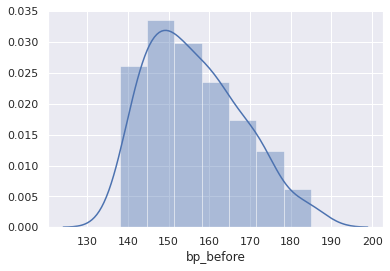

In [33]:
sns.distplot(df['bp_before'])

## RESEARCHPY

In [36]:
rp.summary_cont(df['bp_before'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,bp_before,120.0,156.45,11.389845,1.039746,154.391199,158.508801


This method returns less overall information compared to the describe() method, but it does return more in-depth information regarding the mean. It returns the non-missing count, mean, stand deviation (SD). standard error (SE), and the 95% confidence interval.

In [38]:
rp.summary_cat(df['sex'])

,Variable,Outcome,Count,Percent
0,sex,Female,60,50.0
1,,Male,60,50.0


The method returns the variable name, the non-missing count, and the percentage of each category of a variable. By default, the outcomes are sorted in descending order.

# 2. INFERENTIAL STATISTICS

In [44]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

https://www.pythonfordatascience.org/parametric-assumptions-python/

## PARAMETRIC ASSUMPTIONS

Parametric tests have the same assumptions, or conditions, that need to be met in order for the analysis to be considered reliable.

Parametric test assumptions

1. Independence
2. Population distributions are normal
3. Samples have equal variances

It is best to check the assumptions in the order above since some equal variance tests are sensitive to the distribution being normal.

### NORMALITY TESTS

#### Shapiro-Wilk (SW) Test

The null hypothesis is that the data is normal. The Shapiro-Wilk test is an omnibus test (D'Agostino, 1971). It evaluates normality by comparing the data's distribution (values ordered) to the hypothesized normal distribution (Shapiro & Wilk, 1965). This can be completed in Python by using the shapiro() method from Scipy.stats.

Coming from independent t-test framework

In [39]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values
sampling_difference

array([  4,  28,  22,   4,  10,   2,  -1,   6,   0, -10,  31,  24, -33,
        15,   6, -25,  13, -13, -13,  15,  41,   5,  -2, -15,   3,  14,
       -12,  47,   6,  30,   6,   7,  18,  44,  14,  17, -12,  14,   3,
        31, -11,  17,  19,  11,  15,  21,   2, -10,  33,   9, -15,  17,
        16, -14,  43,  -6,  24, -27,  10,   1])

In [42]:
stats.shapiro(sampling_difference)

(0.98586106300354, 0.7147841453552246)

From regression or ANOVA framework

In [46]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data= df).fit()

stats.shapiro(model.resid)

(0.9816310405731201, 0.10094476491212845)

Unfortunately it's not labelled, but the output is (W test statistic, p-value).

#### D'Agostino-Pearson K2 Test

The null hypothesis is that the data is normal. The D'Agostino-Pearson test is an omnibus test and evaluates normality by assessing the skewness and kurtosis (D'Agostino, 1971).

In [47]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                    df['bp_after'][df['sex'] == 'Female'].values

stats.normaltest(sampling_difference)

NormaltestResult(statistic=0.003175119018886905, pvalue=0.9984136999965528)

In [48]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data= df).fit()

stats.normaltest(model.resid)

NormaltestResult(statistic=2.9626037518316215, pvalue=0.22734152518547265)

#### Kolmogorov-Smirnov (KS) Test

The null hypothesis is that the data is normal (matches compared distribution). The Kolmogorov-Smirnov test is a distance test (D'Agostino, 1971). It evaluates normality by comparing the data's empirical distribution function to the expected cumulative distribution function of the comparison distribution (Öztuna D., Elhan A., & Tüccar, 2006).

If testing the difference between two groups, then this can be completed using the ks_2samp() method from Scipy.stats.

In [49]:
stats.ks_2samp(df['bp_after'][df['sex'] == 'Male'],
               df['bp_after'][df['sex'] == 'Female'])

Ks_2sampResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)

In [50]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data= df).fit()

stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.450217970843921, pvalue=1.0174625716712685e-22)

#### Anderson-Darling

In [51]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

result = stats.anderson(sampling_difference)

print(f'Test statistic: {result.statistic: .4f}')

for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)")
    else:
        print(f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)")


Test statistic:  0.2987
At 15.0% significance, 0.2987 < 0.5440 data looks normal (fail to reject H0)
At 10.0% significance, 0.2987 < 0.6190 data looks normal (fail to reject H0)
At 5.0% significance, 0.2987 < 0.7430 data looks normal (fail to reject H0)
At 2.5% significance, 0.2987 < 0.8660 data looks normal (fail to reject H0)
At 1.0% significance, 0.2987 < 1.0300 data looks normal (fail to reject H0)


In [52]:
result.critical_values

array([0.544, 0.619, 0.743, 0.866, 1.03 ])

In [53]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data= df).fit()

result = stats.anderson(model.resid)

print(f'Test statistic: {result.statistic: .4f}')
for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)")
    else:
        print(f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)")

Test statistic:  0.4467
At 15.0% significance, 0.4467 < 0.5580 data looks normal (fail to reject H0)
At 10.0% significance, 0.4467 < 0.6360 data looks normal (fail to reject H0)
At 5.0% significance, 0.4467 < 0.7630 data looks normal (fail to reject H0)
At 2.5% significance, 0.4467 < 0.8900 data looks normal (fail to reject H0)
At 1.0% significance, 0.4467 < 1.0590 data looks normal (fail to reject H0)


### GRAPHICAL METHODS

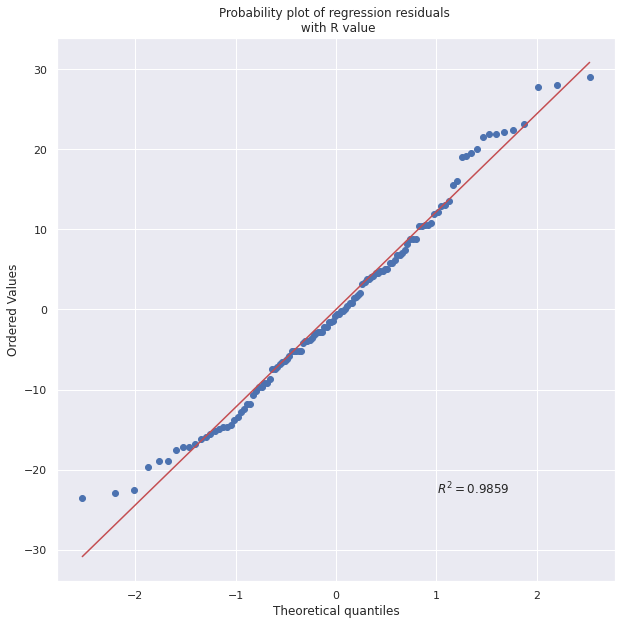

In [56]:

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data= df).fit()

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

plt.show()

### HOMOGENEITY OF VARIANCES

In [57]:
stats.bartlett(df['bp_after'][df['sex'] == 'Male'],
               df['bp_after'][df['sex'] == 'Female'])

BartlettResult(statistic=3.9379638422812793, pvalue=0.047207884641474476)

In [58]:
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'])


LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [59]:
# Using the median

stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'], center= "median")

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [60]:
# Using the trimmed mean (Default is to cut 10% total - 5% from each tail)

stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'], center= "trimmed")

LeveneResult(statistic=7.769755793226307, pvalue=0.006297605035462623)

WHAT IF HOMOGENEITY OF VARIANCES IS VIOLATED?
If there is not equal variances between groups there are a few routes to consider, these are in no particular order:

- Use a non-parametric statistical test
- Transform the data

Common data transformation methods will be provided in the next section.

### DATA TRANSFORMATION

If the assumption(s) of normality or homogeneity of variances are not met then a route to consider is transforming the data. If this is the route that is decided on to try and correct not meeting one or both of the assumptions don't forget to back-transform the data for reporting and interpreting. Some data transformations effect normality and variances differently so different transformations should be tested. There are of course, common transformations that are used.

## Variance, Covariance and correlation

###DEFINITIONS AND DATA

The difference between variance, covariance, and correlation is:

- Variance is a measure of variability from the mean
- Covariance is a measure of relationship between the variability of 2 variables - covariance is scale dependent because it is not standardized
- Correlation is a of relationship between the variability of of 2 variables - correlation is standardized making it not scale dependent

A more in-depth look into each of these will be discussed below. First to import the required packages and create some fake data.

In [61]:
# Setting a seed so the example is reproducible
np.random.seed(4272018)

df = pd.DataFrame(np.random.randint(low= 0, high= 20, size= (5, 2)),
                  columns= ['Commercials Watched', 'Product Purchases'])

df

,Commercials Watched,Product Purchases
0,10,13
1,15,0
2,7,7
3,2,4
4,16,11


In [62]:
df.agg(["mean", "std"])

,Commercials Watched,Product Purchases
mean,10.000000,7.000000
std,5.787918,5.244044


### Variance

Variance is a measure of how much the data for a variable varies from it's mean. This can be represented with the following equation:

In [63]:
df.var()

Commercials Watched    33.5
Product Purchases      27.5
dtype: float64

### Covariance

Covariance is a measure of relationship between 2 variables that is scale dependent, i.e. how much will a variable change when another variable changes.

In [64]:
df.cov()

,Commercials Watched,Product Purchases
Commercials Watched,33.50,3.25
Product Purchases,3.25,27.50


Interpreting covariance is hard to gain any meaning from since the values are not scale dependent and does not have any upper bound. This is where correlation comes in.

### CORRELATION

Correlation overcomes the lack of scale dependency that is present in covariance by standardizing the values. This standardization converts the values to the same scale, the example below will the using the Pearson Correlation Coeffiecient. The equation for converting data to Z-scores is:

In [65]:
df.corr()

,Commercials Watched,Product Purchases
Commercials Watched,1.000000,0.107077
Product Purchases,0.107077,1.000000


## INDEPENDENT T-TEST

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

Parametric test assumptions

- Population distributions are normal
- Samples have equal variances
- The two samples are independent

 
 
 
 
One rejects the the null hypothesis, 
, if the computed t value is greater than or less than the critical t value. The critical t value is determined by the degrees of freedom and alpha, , value. Degrees of freedom is calculated as 
 and  is commonly set to 0.05. Reject 
 if:
 
Before the decision to accept or reject the null hypothesis the assumptions need to be checked. See this page on how to check the parametric assumptions.

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


### INDEPDENT T-TEST USING RESEARCHPY

In [68]:
summary, results = rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
                            group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")
print(summary)

   Variable      N        Mean         SD        SE   95% Conf.    Interval
0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046


In [69]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =     8.3167
1          Degrees of freedom =   118.0000
2                           t =     3.3480
3       Two side test p value =     0.0011
4      Difference < 0 p value =     0.9995
5      Difference > 0 p value =     0.0005
6                   Cohen's d =     0.6112
7                   Hedge's g =     0.6074
8               Glass's delta =     0.5456
9                           r =     0.2945


Interpretation

The average blood pressure after the treatment for males, M= 155.2 (151.6, 159.5), was statistically signigicantly higher than females, M= 147.2 (144.2, 150.2); t(118)= 3.3480, p= 0.001.

### INDEPDENT T-TEST USING SCIPY.STATS

In [70]:
stats.ttest_ind(df['bp_after'][df['sex'] == 'Male'],
                df['bp_after'][df['sex'] == 'Female'])

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)

Interpretation

There is a statistically significant difference in the average post blood pressure between males and females, t= 3.3480, p= 0.001.

### ASSUMPTION CHECK

The assumptions in this section need to be met in order for the test results to be considered valid. A more in-depth look at parametric assumptions is provided here, which includes some potential remedies.

THE TWO SAMPLES ARE INDEPENDENT

This assumption is tested when the study is designed. What this means is that no individual has data in group A and B.

POPULATION DISTRIBUTIONS ARE NORMAL

One of the assumptions is that the sampling distribution is normally distributed. This test of normality applies to the difference in values between the groups. One method for testing this assumption is the Shapiro-Wilk test. This can be completed using the shapiro() method from Scipy.stats.

In [71]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

stats.shapiro(sampling_difference)

(0.98586106300354, 0.7147841453552246)

Unfortunately, the output is not labelled but is in the format of (W test statistic, p-value). The test is not significant which indicates the sampling distribution is normally distributed.

Another way to test the assumption is through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

One method of visually checking the distribution is to use a probability plot with or without the correlation value, 
, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats.

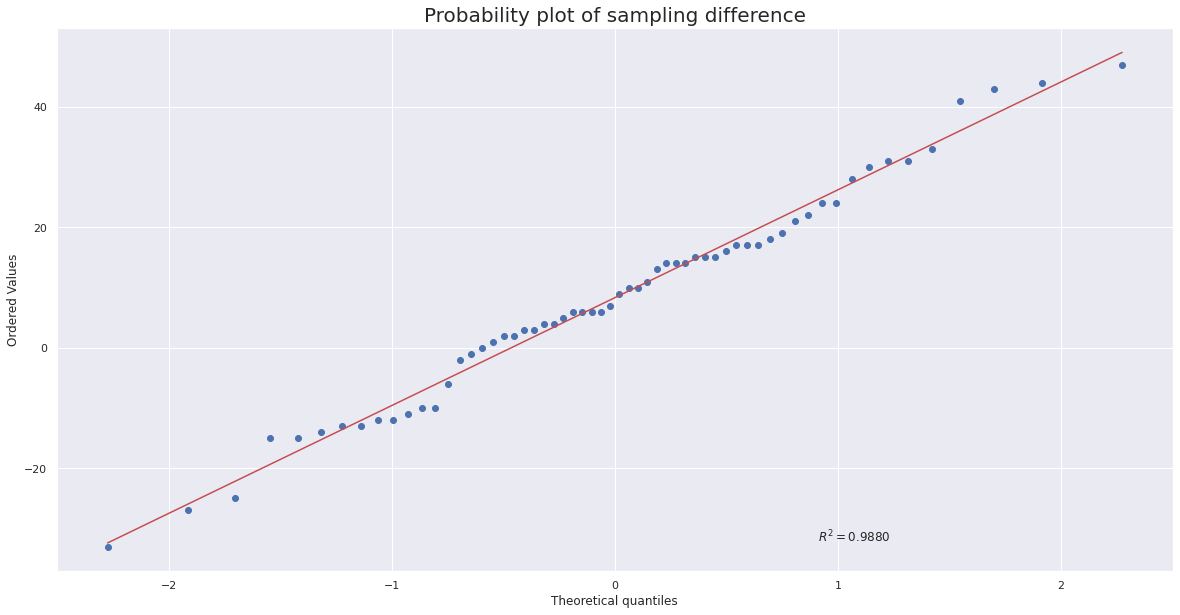

In [72]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

Both methods support the same finding which is that the sampling distribution is normally distributed.

### HOMOGENEITY OF VARIANCE

One of the assumptions is that both groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats.

In [73]:
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'],
             center= 'mean')

LeveneResult(statistic=5.865854141268659, pvalue=0.01695904277978066)

The test is significant which indicates the groups have a different amount of variation and that the t-test may not be the best statistical method to be used. Again, it may be worthwhile to check this assumption visually as well.

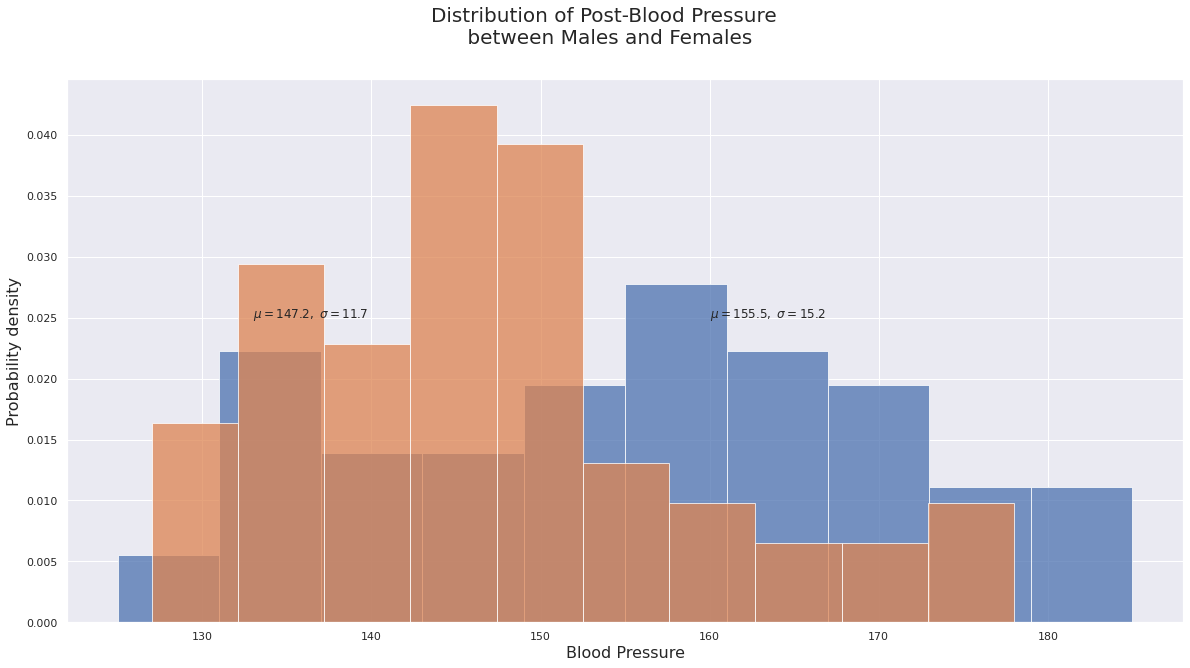

In [74]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(df['bp_after'][df['sex'] == 'Male'], label= "Male",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df['bp_after'][df['sex'] == 'Female'], label= "Female",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Post-Blood Pressure \n between Males and Females", fontsize= 20)
plt.xlabel("Blood Pressure", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Female'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Female'].std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Male'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Male'].std(): .1f}$")


plt.show()

There are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test.

In [75]:
t, p = stats.ttest_ind(
  df['bp_after'][df['sex'] == 'Male'],
  df['bp_after'][df['sex'] == 'Female'],
    equal_var=False
)
print('t',t)
print('p',p)

t 3.3479506182111387
p 0.0011129010557490865


In [77]:
t, p = stats.ttest_ind(
  df['bp_after'][df['sex'] == 'Male'],
  df['bp_after'][df['sex'] == 'Female'],
    equal_var=True
)
print('t',t)
print('p',p)

t 3.3479506182111387
p 0.0010930222986154283


## CHI-SQUARE TEST OF INDEPENDENCE

The  test of independence tests for dependence between categorical variables and is an omnibus test. Meaning, that if a significant relationship is found and one wants to test for differences between groups then post-hoc testing will need to be conducted. Typically, a proportions test is used as a follow-up post-hoc test.

The  test of independence analysis utilizes a cross tabulation table between the variables of interest  rows and  columns. Based on the cell counts, it is possible to test if there is a relationship, dependence, between the variables and to estimate the strength of the relationship. This is done by testing the difference between the expected count, , and the observed count, . The subscript i will be used to denote the row group, i.e. , and j will be used to denote the column group, i.e. , meaning the cell will be denoted with the appropriate row and column group subscripts, i.e.  and  will be . Let's take a look at an example cross tabulation.

In [82]:
# To load a sample dataset for this demonstration
import statsmodels.api as sm
import researchpy as rp
import scipy.stats as stats

df = sm.datasets.webuse("citytemp2")
df

,division,region,heatdd,cooldd,tempjan,tempjuly,agecat
0,N. Eng.,NE,NaN,NaN,16.600000,69.599998,19-29
1,N. Eng.,NE,7947.0,250.0,18.200001,68.000000,19-29
2,Mid Atl,NE,7480.0,424.0,18.400000,70.199997,19-29
3,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
4,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
...,...,...,...,...,...,...,...
951,Pacific,West,0.0,3134.0,71.400002,75.400002,35+
952,Pacific,West,0.0,4389.0,72.599998,80.099998,35+
953,Pacific,West,0.0,4389.0,72.599998,80.099998,35+
954,Pacific,West,0.0,4389.0,72.599998,80.099998,35+


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   division  956 non-null    category
 1   region    956 non-null    category
 2   heatdd    953 non-null    float64 
 3   cooldd    953 non-null    float64 
 4   tempjan   954 non-null    float32 
 5   tempjuly  954 non-null    float32 
 6   agecat    956 non-null    category
dtypes: category(3), float32(2), float64(2)
memory usage: 33.3 KB


In [81]:
rp.summary_cat(df[["agecat", "region"]])

,Variable,Outcome,Count,Percent
0,agecat,19-29,507,53.03
1,,30-34,316,33.05
2,,35+,133,13.91
3,region,N Cntrl,284,29.71
4,,West,256,26.78
5,,South,250,26.15
6,,NE,166,17.36


### CHI-SQUARE TEST OF INDEPENDENCE WITH SCIPY.STATS

In [84]:
crosstab = pd.crosstab(df["region"], df["agecat"])

crosstab

agecat,19-29,30-34,35+
region,,,
NE,46,83,37
N Cntrl,162,92,30
South,139,68,43
West,160,73,23


In [85]:
stats.chi2_contingency(crosstab)

(61.28767688406036,
 2.463382670201326e-11,
 6,
 array([[ 88.0356,  54.8703,  23.0941],
        [150.6151,  93.8745,  39.5105],
        [132.5837,  82.636 ,  34.7803],
        [135.7657,  84.6192,  35.6151]]))

Returns
chi2: float,The test statistic.

p:float,The p-value of the test

dof: int, Degrees of freedom

expected: ndarray, same shape as observed:
The expected frequencies, based on the marginal sums of the table.

There is a relationship between region and the age distribution, X^2 (6) = 61.29, p< 0.0001.

### CHI-SQUARE TEST OF INDEPENDENCE WITH RESEARCHPY

In [86]:
crosstab, test_results, expected = rp.crosstab(df["region"], df["agecat"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

agecat                      
agecat   19-29  30-34    35+     All
region                              
NE        4.81   8.68   3.87   17.36
N Cntrl  16.95   9.62   3.14   29.71
South    14.54   7.11   4.50   26.15
West     16.74   7.64   2.41   26.78
All      53.03  33.05  13.91  100.00

In [87]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,61.2877
1,p-value =,0.0000
2,Cramer's V =,0.1790


### ASSUMPTION CHECK

Checking the assumptions for the  test of independence is easy. Let's recall what they are:

- The two samples are independent

The variables were collected independently of each other, i.e. the answer from one variable was not dependent on the answer of the other

- No expected cell count is = 0
- No more than 20% of the cells have and expected cell count < 5

The last two assumptions can be checked by looking at the expected frequency table.

In [88]:
expected

agecat                      
agecat        19-29      30-34        35+
region                                   
NE        88.035565  54.870293  23.094142
N Cntrl  150.615063  93.874477  39.510460
South    132.583682  82.635983  34.780335
West     135.765690  84.619247  35.615063

It can be seen that all the assumptions are met which indicates the statistical test results are reliable.

## ONE-WAY ANOVA


ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups. Since it is an omnibus test, it tests for a difference overall, i.e. at least one of the groups is statistically significantly different than the others. However, if the ANOVA is significant one cannot tell which group is different. In order to tell which group is different, one has to conduct planned or post-hoc comparisons. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

The reason why it's called an one-way or one factor ANOVA even though there are 3 or more groups being tested is because those groups are under one categorical variable, such as race or education level, and the name is referring to the number of variables in the analysis and not the number of groups. If there are two variables being compared it would technically be called a two-way, or two factor, ANOVA if both variables are categorical, or it could be called an ANCOVA if the 2nd variable is continuous. The "C" doesn't stand for continuous, it stands for covariate.

When working from the ANOVA framework, independent variables are sometimes referred to as factors and the number of groups within each variable are called levels, i.e. one variable with 3 categories could be referred to as a factor with 3 levels.

In [93]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)
# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [94]:
rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.466667,1.76743,0.456349,2.487896,4.445437


In [95]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.581139,0.707107,3.450484,6.549516
low,5,3.2,1.303840,0.583095,1.922236,4.477764
placebo,5,2.2,1.303840,0.583095,0.922236,3.477764


### ONE-WAY ANOVA USING SCIPY.STATS

In [96]:
stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

Interpretation

A new medication was developed to increase the libido of those who take the medication. The purpose of this study was to test for a difference between the dosage levels. The overall average libido was 3.5 95% CI(2.5, 4.4) with group averages of 2.2 95% CI(0.9, 3.5) for the placebo group; 3.2 95% CI(1.9, 4.5) for the low dose group; and 5.0 95% CI(3.5, 6.5) for the high dose group. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247.

### ONE-WAY ANOVA USING STATSMODELS

This method conducts a one-way ANOVA in two steps:

1. Fit the model using an estimation method,
The default estimation method in most statistical software packages is ordinary least squares

Not going to dive into estimation methods as it's out of scope of this section's topic

If you are not familiar with it and don't care to really dive into it, then just know it's one of many types of estimation methods that aim to provide estimates of the parameter (mean, propertion, etc.) being tested

2. Pass fitted model into ANOVA method to produce ANOVA table

Here is the official StatsModels documentation on an ANOVA. The general structure for entering the equation is:

In [98]:
# ols("outcome_variable ~ independent_variable", data= data_frame).fit()

In [99]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


This table provides all the information one needs in order to interprete if the results are significant; however, it does not provide any effect size measures to tell if the statistical significance is meaningful. The function below calculates eta-squared (
) and omega-squared (
). A quick note, 
 is the exact same thing as 
 except when coming from the ANOVA framework people call it 
; 
 is considered a better measure of effect size since it is unbiased in it's calculation by accounting for the degrees of freedom in the model.

In [100]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


Interpretation

A new medication was developed to increase libido. The purpose of this study was to test for a difference between the dosage levels. The overall average libido was 3.5 95% CI(2.5, 4.4) with group averages of 2.2 95% CI(0.9, 3.5) for the placebo group; 3.2 95% CI(1.9, 4.5) for the low dose group; and 5.0 95% CI(3.5, 6.5) for the high dose group. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247, with an overall large effect, 
= 0.35.

In order to tell which groups differed significantly, post-hoc tests need to be conducted. Before one goes through that work, the assumptions should be checked first in case any modifications need to be made to the model.

### ASSUMPTION CHECK

In [101]:
stats.shapiro(model.resid)

(0.916691780090332, 0.1714704930782318)

The test is non-significant, W= 0.9167, p= 0.1715, which indicates that the residuals are normally distributed.

Another way to test the assumption is through a visual check- this is helpful when the sample is large. The reason this is true is that as the sample size increases, the statistical test's ability to reject the null hypothesis increases, i.e. it gains power to detect smaller differences as the sample size n increases.

One method of visually checking the distribution is to use a probability plot with or without the correlation value, 
, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the Gaussian (a.k.a the normal) distribution. This can be completed by using the probplot() method from Scipy.stats. If using the 
 measure, one can refer to the NIST/SEMATECH e-handbook of statistical methods to see if the value is significant.

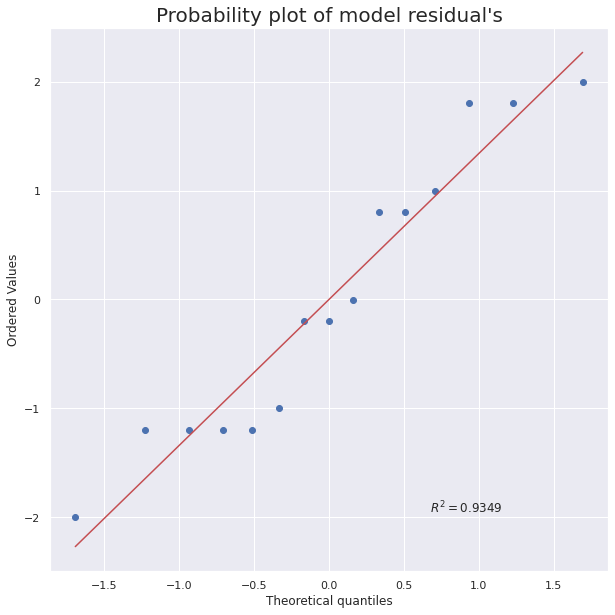

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

This is a case where the statistical testing method indicated the residuals were normally distributed, but the probability plot correlation coefficient (PPCC) indicated non-normality. Given the current example's sample size is small, N= 15, the Shapiro-Wilk test indicated normality, and that the calculated PPCC, 
= 0.9349, is ever so slightly smaller than the table PPC, 
= 0.9376, it is reasonable to state this assumption is met. However, looking at the plotted probability plot and the residual structure it would also be reasonable to transform the data for the analysis, or to use a non-parametric statistical test such as Welch's ANOVA or the Kruskal-Wallis ANOVA.

### HOMOGENEITY OF VARIANCE

The final assumption is that all groups have equal variances. One method for testing this assumption is the Levene's test of homogeneity of variances. This can be completed using the levene() method from Scipy.stats.

In [103]:
stats.levene(df['libido'][df['dose'] == 'high'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

The Levene's test of homogeneity of variances is not significant which indicates that the groups have non-statistically significant difference in their varability. Again, it may be worthwhile to check this assumption visually as well.

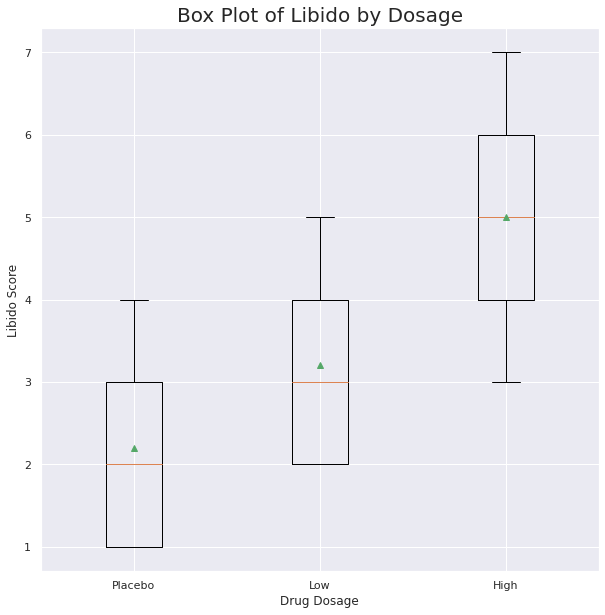

In [104]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

The graphical testing of homogeneity of variances supports the statistical testing findings which is the groups have equal variance.

By default box plots show the median (orange line in graph above). The green triangle is the mean for each group which was an additional argument that was passed into the method.

There are different ways to handle heteroskedasticity (unequal variance) and a decision needs to be made. Some options include, but is not limited to, transformming the dependent variable (outcome), could use trimmed means, robust standard errors, or use a parametric test suchs as the Welch's t-test. For a more in-depth look at the assumptions and some potential remedies, please check out this page.

### POST-HOC TESTING

By conducting post-hoc tests or planned comparisons it allows one to see which group(s) significantly differ from each other; remember that the ANOVA is an omnibus test! There are a few different approaches that can be taken while conducting these tests, ones that are implemented in StatsModels currently are:

#### TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)

In [105]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


Now to make sense of the table.

- At the top the table testing information is provided
FWER is the familywise error rate, i.e. what  is being set to and controlled at
- group1 and group2 columns are the groups being compared
- meandiff is the difference between the group means
- p-adj is the corrected p-value which takes into account the multiple comparisons being conducted
- lower is the lower band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.
- upper is the upper band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.
- reject is the decision rule based on the corrected p-value
It is possible to plot the difference using this method as well!

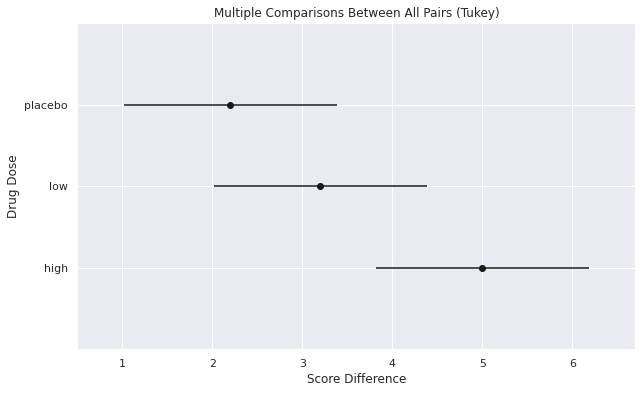

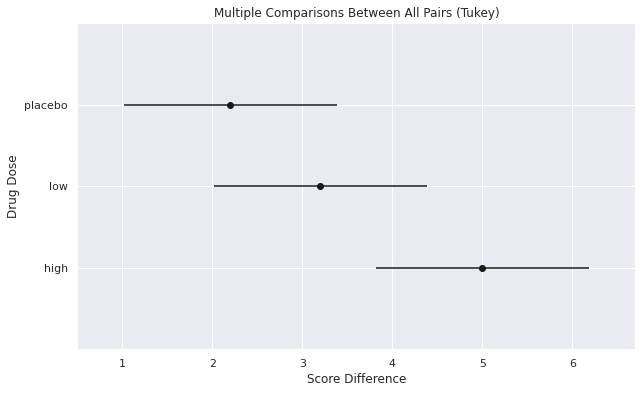

In [107]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")

Using Tukey HSD to test for differences between groups indicates that there is a statistically significant difference in libido score between those who took the placebo and those who took the high dosage of the medication, no other groups differed significantly. What this indicates is that the high dosage of the medication is effective at increasing libido, but the low dosage is not.

#### BONFERRONI CORRECTION

In [109]:
comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2554,False
high,placebo,3.0551,0.0157,0.0471,True
low,placebo,1.2127,0.2598,0.7795,False


stat is the test statistic value; in this case it would be the t statistic

pval is the uncorrected p-value returned from the supplied "statistical_test_method"

pval_corr is the corrected p-value which has been corrected using whichever "correction_method" was supplied

reject is the decision rule based on the corrected p-value

#### ŠIDÁK CORRECTION (A.K.A. DUNN-ŠIDÁK CORRECTION)

In [112]:
comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2343,False
high,placebo,3.0551,0.0157,0.0464,True
low,placebo,1.2127,0.2598,0.5945,False


## N-WAY ANOVA

When conducting an ANOVA with multiple factors, like in the current demonstration, all factors should be tested for an interaction before looking at their individual main effects. If the interaction between the variables are non-significant, then remove a variable from the interaction and conduct the analysis again. First a 2-factor ANOVA example will be discussed then the discussion will be expanded to discuss a 3-factor ANOVA which will exemplify how complex ANOVAs can get when using multiple factors.

In [115]:
manufac = sm.datasets.webuse('manuf')
manufac.head()


,temperature,chemical,method,yield
0,low,A,stir,5
1,low,A,stir,13
2,low,A,stir,9
3,low,A,fold,8
4,low,A,fold,7


In [114]:
manufac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   temperature  36 non-null     category
 1   chemical     36 non-null     category
 2   method       36 non-null     category
 3   yield        36 non-null     int8    
dtypes: category(3), int8(1)
memory usage: 728.0 bytes


In [116]:
rp.summary_cat(manufac[["temperature", "chemical", "method"]])

,Variable,Outcome,Count,Percent
0,temperature,high,12,33.33
1,,medium,12,33.33
2,,low,12,33.33
3,chemical,B,18,50.00
4,,A,18,50.00
5,method,fold,18,50.00
6,,stir,18,50.00


In [117]:
rp.summary_cont(manufac["yield"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,yield,36.0,7.583333,3.237062,0.53951,6.488069,8.678598


### 3-FACTOR ANOVA USING STATSMODELS

In [119]:
manufac["Yield"] = manufac["yield"]

model = ols("Yield ~ C(temperature, Sum) + C(chemical, Sum) + C(method, Sum) + \
C(temperature, Sum)*C(chemical, Sum)*C(method, Sum)", 
            data=manufac).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,2070.25,1.0,299.313253,4.675019e-15
"C(temperature, Sum)",30.50,2.0,2.204819,1.321133e-01
"C(chemical, Sum)",12.25,1.0,1.771084,1.957540e-01
"C(method, Sum)",42.25,1.0,6.108434,2.093730e-02
"C(temperature, Sum):C(chemical, Sum)",24.50,2.0,1.771084,1.916714e-01
"C(temperature, Sum):C(method, Sum)",87.50,2.0,6.325301,6.216723e-03
"C(chemical, Sum):C(method, Sum)",0.25,1.0,0.036145,8.508161e-01
"C(temperature, Sum):C(chemical, Sum):C(method, Sum)",3.50,2.0,0.253012,7.785036e-01
Residual,166.00,24.0,NaN,NaN


The interaction between temperature, chemical type, and method is statistically non-significant. This indicates that different level combinations of the factors do not produce a significant difference in the yield. Thus this term should be removed from the ANOVA model and re-ran looking at the 2-factor interactions.

In [120]:
model = ols("Yield ~ C(temperature, Sum) + C(chemical, Sum) + C(method, Sum) +\
 C(temperature, Sum):C(chemical, Sum) + C(temperature, Sum):C(method, Sum) +\
  C(chemical, Sum):C(method, Sum)", data=manufac).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,2070.25,1.0,317.560472,4.292571e-16
"C(temperature, Sum)",30.50,2.0,2.339233,1.163633e-01
"C(chemical, Sum)",12.25,1.0,1.879056,1.821599e-01
"C(method, Sum)",42.25,1.0,6.480826,1.717637e-02
"C(temperature, Sum):C(chemical, Sum)",24.50,2.0,1.879056,1.728955e-01
"C(temperature, Sum):C(method, Sum)",87.50,2.0,6.710914,4.467613e-03
"C(chemical, Sum):C(method, Sum)",0.25,1.0,0.038348,8.462683e-01
Residual,169.50,26.0,NaN,NaN


The only 2-factor interaction that is statistically significant is between temperature and method, the other 2-factor interactions should be removed and the model needs to be re-ran.

In [121]:
model = ols("Yield ~ C(temperature, Sum) + C(chemical, Sum) + C(method, Sum) +\
 C(temperature, Sum):C(method, Sum)", data=manufac).fit()

aov_table = sm.stats.anova_lm(model, typ=3)
aov_table

,sum_sq,df,F,PR(>F)
Intercept,2070.25,1.0,309.072072,5.239664e-17
"C(temperature, Sum)",30.50,2.0,2.276705,1.206672e-01
"C(chemical, Sum)",12.25,1.0,1.828829,1.867181e-01
"C(method, Sum)",42.25,1.0,6.307593,1.784464e-02
"C(temperature, Sum):C(method, Sum)",87.50,2.0,6.531532,4.552060e-03
Residual,194.25,29.0,NaN,NaN


The sum of squares that each factor accounted for did not change while removing non-significant factors from the model due to the nature of Type III sum of squares. The information that did change are the F-statistics and their respective p-values, as well as the residual sum of squares and the residual degrees of freedom.

**Interpretation**

A study was designed to determine the optimal operating conditions to maximize yield. The study assessed temperature settings, chemical supply companies, and two mixing methods. The overall interaction between the three factors was statistically non-significant, F(2, 24.0)= 0.2530, p-value= 0.7786. After looking at the reduced model which included all possible 2-factor interactions, the only significant interaction was between temperature and method. The non-signifance interactions were removed and the final model showed that temperature and method have a statistically significant interaction effect on yield, F(2, 29)=6.5315, p-value= 0.0045.

Note: It's important to include the other model's in documentation to show full model results of all model's tested.

### ASSUMPTION CHECK AND POST-HOC TESTING

To see how to check the assumptions using an ANOVA model please refer to the assumption check section of the one-way ANOVA. For a more in-depth look at the assumptions and some potential remedies, please check out this page.

To see how to conduct post-hoc testing, please refer to the post-hoc testing section of the one-way ANOVA page. Before you leave and conduct post-hoc testing it should be noted that an easy way to test for group difference of the interaction term using StatsModels is to create a column in the data frame which represents the possible group combinations of the significant interaction term and use this instead of trying to use a groupby object. A quick demonstration is below, but still refer to the post-hoc testing page as mentioned for a more in-depth demonstration.

In [124]:
manufac.temperature.astype(str)

0        low
1        low
2        low
3        low
4        low
5        low
6        low
7        low
8        low
9        low
10       low
11       low
12    medium
13    medium
14    medium
15    medium
16    medium
17    medium
18    medium
19    medium
20    medium
21    medium
22    medium
23    medium
24      high
25      high
26      high
27      high
28      high
29      high
30      high
31      high
32      high
33      high
34      high
35      high
Name: temperature, dtype: object

In [122]:
interaction_groups = "Temp_" + manufac.temperature.astype(str) + " & " + "Method_" +\
 manufac.method.astype(str)

comp = mc.MultiComparison(manufac["Yield"], interaction_groups)
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Temp_high & Method_fold,Temp_high & Method_stir,-5.5,0.0121,-10.1071,-0.8929,True
Temp_high & Method_fold,Temp_low & Method_fold,-6.0,0.0052,-10.6071,-1.3929,True
Temp_high & Method_fold,Temp_low & Method_stir,-4.0,0.1186,-8.6071,0.6071,False
Temp_high & Method_fold,Temp_medium & Method_fold,-2.5,0.5645,-7.1071,2.1071,False
Temp_high & Method_fold,Temp_medium & Method_stir,-5.5,0.0121,-10.1071,-0.8929,True
Temp_high & Method_stir,Temp_low & Method_fold,-0.5,0.9,-5.1071,4.1071,False
Temp_high & Method_stir,Temp_low & Method_stir,1.5,0.9,-3.1071,6.1071,False
Temp_high & Method_stir,Temp_medium & Method_fold,3.0,0.3775,-1.6071,7.6071,False
Temp_high & Method_stir,Temp_medium & Method_stir,0.0,0.9,-4.6071,4.6071,False
Temp_low & Method_fold,Temp_low & Method_stir,2.0,0.7462,-2.6071,6.6071,False


## Linear Regression

https://www.pythonfordatascience.org/linear-regression-python/

Linear regression is used to test the relationship between independent variable(s) and a continous dependent variable. The overall regression model needs to be significant before one looks at the individual coeffiecients themselves. The model's signifance is measured by the F-statistic and a corresponding p-value. If the overall F-statistic is not significant, it indicates that the current model is no better than using the mean value of the dependent variable at predicting the outcome.

Regression models are useful because it allows one to see which variable(s) are important while taking into account other variables that could influence the outcome as well. Furthermore, once a regression model is decided on, there is a good amount of additional post-estimation work that can be done to further explore the relationship(s) that may be present.

Since linear regression is a parametric test it has the typical parametric testing assumptions. In addition to this, there is an additional concern of multicollinearity. While multicollinearity is not an assumption of the regression model, it's an aspect that needs to be checked. Multicollinearity occurs when an independent variable is able to be predicted, with good accuracy, by another independent variable in the same model. Multicollinearity is a concern because it weakens significance of independent variables. How to test for this will be demonstrated later on.

For this demonstration, the conventional p-value of 0.05 will be used.

Parametric test assumptions

- Population distributions are normal
- Samples have equal variances
- Independence

In [125]:
import pandas as pd
import researchpy as rp
import statsmodels.api as sm


df = sm.datasets.webuse('auto')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [126]:
df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [127]:
rp.summary_cont(df[['weight', 'mpg']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,weight,74.0,3019.459459,777.193567,90.346917,2839.398314,3199.520605
1,mpg,74.0,21.297297,5.785503,0.672551,19.956905,22.637690


In [128]:
rp.summary_cat(df['foreign'])

,Variable,Outcome,Count,Percent
0,foreign,Domestic,52,70.27
1,,Foreign,22,29.73


From the descriptive statistics it can be seen that the average weight is 3,019.46, we'll say the unit of measure is pounds (lbs.), and the average miles per galloon (mpg) is 21.30. The sample consists of approx. 40% more cases from foreign makers than domestic. Since foreign is a categorical variable, let's look at mpg by manufacturer.

In [129]:
rp.summary_cont(df.groupby('foreign')['mpg'])

,N,Mean,SD,SE,95% Conf.,Interval
foreign,,,,,,
Domestic,52,19.826923,4.743297,0.657777,18.525102,21.128744
Foreign,22,24.772727,6.611187,1.409510,21.945076,27.600379


The amount of varability in mpg between the manufacturer types appears to be pretty equal. There is a way to formally test this, but right now this eye ball test will suffice. Now for the linear regression model.

### LINEAR REGRESSION USING STATSMODELS

To tell the model that a variable is categorical, it needs to be wrapped in C(independent_variable). The pseudo code with a categorical independent variable looks like:

In [130]:
import statsmodels.formula.api as smf
model = smf.ols("mpg ~ weight + C(foreign)", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     69.75
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.76e-17
Time:                        06:07:37   Log-Likelihood:                -194.18
No. Observations:                  74   AIC:                             394.4
Df Residuals:                      71   BIC:                             401.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.6797      2.166     19.247      0.000      37.362      45.998
C(foreign)[T.Foreign]    -1.6500      1.076     -1.533      0.130      -3.796       0.495
weight                   -0.0066      0.001    -10.340      0.000      -0.008      -0.005
==============================================================================
Omnibus:                       37.830   Durbin-Watson:                   2.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.107
Skew:                           1.727   Prob(JB):                     9.98e-21
Kurtosis:                       7.236   Cond. No.                     1.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

StatsModels provides some useful model diagnostics with the summary output, let's go over them since they will be used to evaluate the model.

- Omnibus: Tests for normality of residuals
- Prob(Omnibus): P-value associated with omnibus test
- Skew: Value indicates the slant, for ease of explanation, of the distribution
- Kurtosis: Value indicates the sharpness of the peak of the distribution
- Durbin-Watson: Tests for autocorrelation in the residuals. Unfortunately a table for critical values is not provided, but there are some available through a Google search
- Jarque-bera (JB): Another test for normality of residuals
- Prob(JB): P-value associated with JB test statistic
- Cond. No.: A test for multicollinearity and estimation instability

Using this information, one can evaluate the regression model. The current overal model is significant which indicates it's better than using the mean to predict the mpg, no observations were dropped, but StatsModels diagnostic information is indicating there may be a concern of multicollinearity, or other numerical problems such as estimation concerns, based on the condition number.

# TO BE continued...